# COGS 108 - Final Project 

# Team 178: Small-Baller Brand

- George Hu - XXXXXXXXX
- Ryan Shim - XXXXXXXXX
- Sunny Zhou - XXXXXXXXX

# Overview

The NBA has been experiencing a transition from a half court pacing to running and spreading the floor by using more shooters in lineups. We want to investigate whether or not there has been a statistically significant change in the average height and weight of lineups/players in the NBA over the years (transition to small-ball, a strategy modern NBA teams employ to run faster paced plays with better ball movement). We then want to explore the trends on if diffferent styles of shots are being taken and what style of shots are currently more popular. Hopefully, by the end of this analysis, we will know if the NBA has changed their strategy for scoring points.

We suspect that the NBA has been employing more small ball strategies over the past few years and want to explore if this is true. Our group wants to find out if there has been a recent meta shift in the NBA towards using small-ball strategies. According to Wikipedia, small-ball is defined as “a style of play that sacrifices height, physical strength and low post offense/defense in favor of a lineup of smaller players for speed, agility and increased scoring (often from the three-point line).” We'll use various visualizations to see how the NBA meta has changed in terms of height, weight, 3-point percentages, and other factors.


# Research Question

Has the NBA transitioned towards employing more “small-ball” strategies over the past few years/decades? 


## Background and Prior Work

https://towardsdatascience.com/the-evolution-of-the-nba-3-point-line-da6700714ad2 
<br>
The above article is a study done regarding the evolution of the 3 point shot over time. As the data indicates, not only is there a greater number of 3 point shots taken, but there is also a proportionally greater number of 3 point shots when compared to 2 point shots. In fact, while the number of 2 point shots taken have been stagnant for the last 40 years, it seems that the number of 3 point shots taken have always increased every 5 years. Furthermore, there seems to be extreme outliers in terms of players in regards to the 3 point shot, as it can be seen from that data that players like Steph Curry and James Harden are shooting more 3 pointers than ever before in history. The above factors seem to indicate that there is indeed a greater emphasis in spreading the floor when compared to before, as there is a greater need for players to get adequate room to shoot from afar. Furthermore, it would seem to indicate that smaller players who are better shooters do seem to be favored in the modern NBA court, as they seem to be becoming the focus of the team’s offense when compared to prior eras.

http://harvardsportsanalysis.org/2017/11/maybe-we-should-call-it-skinnyball-weight-vs-height-in-the-nba/
<br>
This article describes the small-ball phenomenon as it attempts to find statistically significant data that supports the claim that NBA teams have shifted their strategy to fit around the meta changes of smaller players. The data shows that while the NBA has drastically increased the height and weight of players since the 1960’s, in recent years, the weighted weight of the league has dropped nearly 5 pounds. While the article did not find any statistically significant data regarding lighter or shorter teams winning a higher number of games, it is undeniable that most star players such as Kevin Durant, Chris Bosh and Kevin Love are much skinnier than previous renditions of the role. Furthermore, the data shows that lighter teams have produced a faster playstyle, and using their natural athletic abilities, new superstars are able to out run and out pace heavier teams.


# Hypothesis


Our group, Small Baller Brand, hypothesizes that small-ball strategies have been more effective in recent years, especially with the NBA meta changing to more high quality point guards and a decrease in the number of big men.

We chose this hypothesis because we wanted to see which direction the basketball league will be trending to in the future. Anecdotally, we also noticed that players such as Steph Curry have chosen to shoot three pointers over other forms of scoring and have seen an increased win-rate because of it. We hope to observe a trend in height and three point percentages to see this.



# Dataset(s)

- Dataset Name: NBA Players
- Link to the dataset: https://www.kaggle.com/drgilermo/nba-players-stats
- Number of observations: 3922 rows x 8 columns for players
This dataset records all the players that have played in the NBA from the 1950 to 2017 seasons. It also shows some basic background on the players.
  

- Dataset Name: NBA Seasonal Player stats
- Link to the dataset: https://www.kaggle.com/drgilermo/nba-players-stats
- Number of observations: 24691 rows × 53 columns for seasons
This dataset records all the players' seasonal stats per year starting from 1950 to 2017.


Both data sets come from web scraping done on https://www.basketball-reference.com/. Basketball-reference is a trusted source as it utilizes Official NBA data provided by Sportradar, the official stats partner of the NBA. The site itself is run by the company Sports Reference LLC.

We intend to use the player weight/height columns from the players dataframe and merge it into the seasonal stats dataframe in order to be able to access weights/heights of the entire NBA per season.

# Setup - Imports

In [5]:
import pandas as pd #quintessential data processing tool
import numpy as np #math, algebra
import matplotlib.pyplot as plt
from matplotlib import animation
import io
import base64
from IPython.display import HTML
plt.style.use('fivethirtyeight')
from subprocess import check_output

#statistical analysis imports
import patsy
import statsmodels.api as sm
import scipy.stats as stats
from scipy.stats import ttest_ind, chisquare, normaltest


In [6]:
pd.set_option('display.max_columns', None) #this shows all columns when we do head()

Before proceeding, we would like to ask anyone that's running this python code to install FFMPEG on their machines to render our graphs. A great tutorial for Windows systems can be found here: https://www.youtube.com/watch?v=SW-iKrT_nJs. 

# Data Cleaning

Describe your data cleaning steps here.

We took our data from https://www.kaggle.com/drgilermo/nba-players-stats and combined the two CSVs in player_data.csv and Season_Stats.csv in order to make our dataframe.

In [7]:
#import our datasets
players = pd.read_csv('Players.csv')
seasons = pd.read_csv('Seasons_Stats.csv')

# These lines drops all the rows of players and seasons where the Player name is null
players = players[pd.isnull(players.Player) == 0]
seasons = seasons[pd.isnull(seasons.Player) == 0]

# These lines add the player's heights and weights to the seasonal data
seasons['height'] = seasons.Player.apply(lambda x: players.height[players.Player == x].values[0])
seasons['weight'] = seasons.Player.apply(lambda x: players.weight[players.Player == x].values[0])

# Data Analysis & Results

We will be using a lot of code from Omri Goldstein, a top Kaggler at Kaggle.com. Our code will follow his height and weight kernel, found at https://www.kaggle.com/drgilermo/height-and-weight-animation#1950-2017. We will modify some of this code to look at other statistics too.

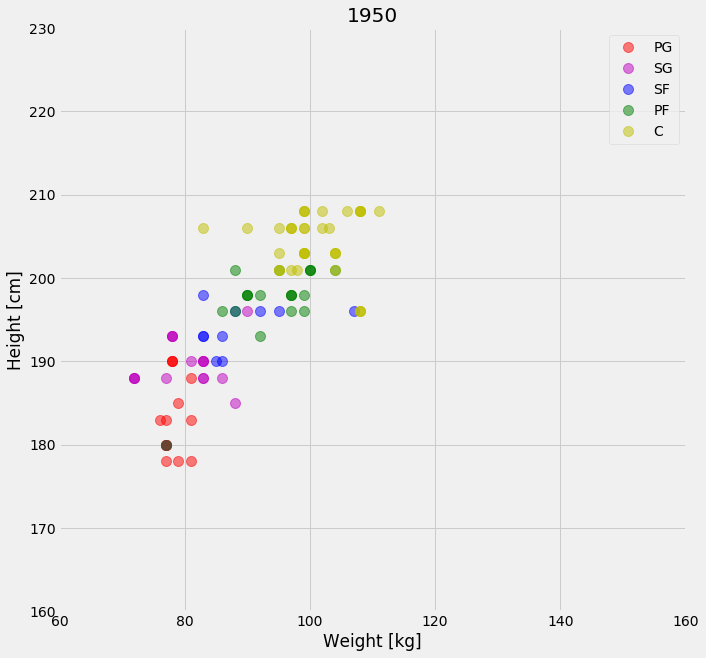

In [8]:
fig = plt.figure(figsize = (10,10))
ax = plt.axes()

plt.style.use('fivethirtyeight')
def animate(year):
    ax.clear()
    ax.set_xlim([60,160])
    ax.set_ylim([160,230])
    ax.set_title(str(int(year)))
    ax.set_xlabel('Weight [kg]')
    ax.set_ylabel('Height [cm]')
    x = seasons.weight[(seasons.Year == year) & (seasons.Pos == 'PG')]
    y = seasons.height[(seasons.Year == year) & (seasons.Pos == 'PG')]
    ax.plot(x,y,'o', color = 'r', markersize = 10, alpha = 0.5)
    x = seasons.weight[(seasons.Year == year) & (seasons.Pos == 'SG')]
    y = seasons.height[(seasons.Year == year) & (seasons.Pos == 'SG')]
    ax.plot(x,y,'o', color = 'm', markersize = 10, alpha = 0.5)
    x = seasons.weight[(seasons.Year == year) & (seasons.Pos == 'SF')]
    y = seasons.height[(seasons.Year == year) & (seasons.Pos == 'SF')]
    ax.plot(x,y,'o', color = 'b', markersize = 10, alpha = 0.5)
    x = seasons.weight[(seasons.Year == year) & (seasons.Pos == 'PF')]
    y = seasons.height[(seasons.Year == year) & (seasons.Pos == 'PF')]
    ax.plot(x,y,'o', color = 'g', markersize = 10, alpha = 0.5)
    x = seasons.weight[(seasons.Year == year) & (seasons.Pos == 'C')]
    y = seasons.height[(seasons.Year == year) & (seasons.Pos == 'C')]
    ax.plot(x,y,'o', color = 'y', markersize = 10, alpha = 0.5)
    ax.legend(['PG','SG','SF','PF','C'], loc = 1)


ani = animation.FuncAnimation(fig,animate,seasons.Year.unique().tolist(), interval = 500)
HTML(ani.to_html5_video())

This is the gif to view our result, as we cannot show video on PDFs:

**https://github.com/georgewho/108FinalProject/blob/master/gifs/height_and_weight_over_the_years.gif**

So as we can see from our animation above, the general weight of NBA players has shifted slightly over to the right (increased weights). Weights haven't changed as much, but the biggest takeaway from this animation is that NBA players are much more VARIED in height and weight as the years pass. In general, this signifies a transition from purely using big-men in NBA to a more variety of heights and weights, indicating players are becoming better all-arounders and coaches/teams prioritize having a more versatile team in terms of height and weight. It's not just about being big anymore.

Next, we'll take a look at height distributions for each decade of the NBA.

Text(0.5,0,'Decade')

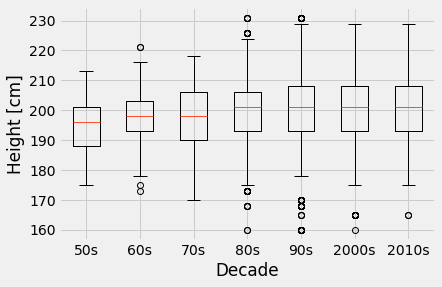

In [9]:
#This code was taken from Omri Goldstein on Kaggle too! Our group does not make claim that this is our code, 
#however his visualizations are extremely helpful in letting us look at data.
data_1 = seasons.height[(seasons.Year > 1950) & (seasons.Year < 1960)]
data_2 = seasons.height[(seasons.Year > 1960) & (seasons.Year < 1970)]    
data_3 = seasons.height[(seasons.Year > 1970) & (seasons.Year < 1980)]    
data_4 = seasons.height[(seasons.Year > 1980) & (seasons.Year < 1990)]    
data_5 = seasons.height[(seasons.Year > 1990) & (seasons.Year < 2000)]   
data_6 = seasons.height[(seasons.Year > 2000) & (seasons.Year < 2010)]    
data_7 = seasons.height[(seasons.Year > 2010) & (seasons.Year < 2020)]   

data = [data_1,data_2,data_3,data_4,data_5,data_6,data_7]
plt.boxplot(data)
plt.xticks([1,2,3,4,5,6,7], ['50s','60s','70s','80s','90s','2000s','2010s'])
plt.ylabel('Height [cm]')
plt.xlabel('Decade')

Overall, we can see that heights are getting much more spread out in the NBA. Previously, it was narrowly thought that bigger players are better, which can sometimes be true. But strategies have been developed around getting through bigger players. This allows a variety of players to play, even if they're heights are shorter.

While the heights seem to be more varied, they don't show a trend of getting much taller nor shorter. Our background research at http://harvardsportsanalysis.org/2017/11/maybe-we-should-call-it-skinnyball-weight-vs-height-in-the-nba/ claims that players have been getting skinner over the years, instead of getting shorter.

Through a simple modification of the above graph, we'll check whether or not we agree that players are lighter in the current NBA vs the past.

Text(0.5,0,'Decade')

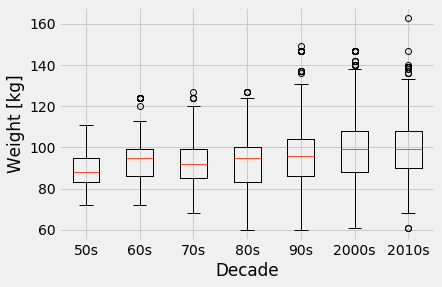

In [10]:
#This code is a simple modified version of the above code in order to show the transition of the weights over the year
data_1 = seasons.weight[(seasons.Year > 1950) & (seasons.Year < 1960)]
data_2 = seasons.weight[(seasons.Year > 1960) & (seasons.Year < 1970)]    
data_3 = seasons.weight[(seasons.Year > 1970) & (seasons.Year < 1980)]    
data_4 = seasons.weight[(seasons.Year > 1980) & (seasons.Year < 1990)]    
data_5 = seasons.weight[(seasons.Year > 1990) & (seasons.Year < 2000)]   
data_6 = seasons.weight[(seasons.Year > 2000) & (seasons.Year < 2010)]    
data_7 = seasons.weight[(seasons.Year > 2010) & (seasons.Year < 2020)] 

data = [data_1,data_2,data_3,data_4,data_5,data_6,data_7]
plt.boxplot(data)
plt.xticks([1,2,3,4,5,6,7], ['50s','60s','70s','80s','90s','2000s','2010s'])
plt.ylabel('Weight [kg]')
plt.xlabel('Decade')

Unfortunately, we have to say that we disagree with the notion that players are getting lighter over the years. While it seems as if there is a slight reduction in weight in the 2010's compared to the 2000's, the overall graph still seems to be trending upwards. 

Now we'll take a look at the 3% data. We will be using 3 PAr, a statistic that's measured as 3 PA / FGA. Regardless of a successful 3 point shot, it's still important for us to know whether teams are priotizing 3 point shots in general.

In [11]:
plt.style.use('fivethirtyeight')
def animate(year):
    ax.clear()
    ax.set_xlim([160,230])
    ax.set_ylim([0,1])
    ax.set_title(str(int(year)))
    ax.set_xlabel('Height (cm)')
    ax.set_ylabel('3PAr (3PA/FGA)')
    x = seasons.height[(seasons.Year == year) & (seasons.Pos == 'PG')]
    y = seasons['3PAr'][(seasons.Year == year) & (seasons.Pos == 'PG')]
    ax.plot(x,y,'o', color = 'r', markersize = 10, alpha = 0.5)
    x = seasons.height[(seasons.Year == year) & (seasons.Pos == 'SG')]
    y = seasons['3PAr'][(seasons.Year == year) & (seasons.Pos == 'SG')]
    ax.plot(x,y,'o', color = 'm', markersize = 10, alpha = 0.5)
    x = seasons.height[(seasons.Year == year) & (seasons.Pos == 'SF')]
    y = seasons['3PAr'][(seasons.Year == year) & (seasons.Pos == 'SF')]
    ax.plot(x,y,'o', color = 'b', markersize = 10, alpha = 0.5)
    x = seasons.height[(seasons.Year == year) & (seasons.Pos == 'PF')]
    y = seasons['3PAr'][(seasons.Year == year) & (seasons.Pos == 'PF')]
    ax.plot(x,y,'o', color = 'g', markersize = 10, alpha = 0.5)
    x = seasons.height[(seasons.Year == year) & (seasons.Pos == 'C')]
    y = seasons['3PAr'][(seasons.Year == year) & (seasons.Pos == 'C')]
    ax.plot(x,y,'o', color = 'y', markersize = 10, alpha = 0.5)
    ax.legend(['PG','SG','SF','PF','C'], loc = 1)

year_list = [1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992, 1993, 1994, 1995, 1996, 
        1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014,
        2015, 2016, 2017]

ani2 = animation.FuncAnimation(fig,animate, year_list, interval = 800)
HTML(ani2.to_html5_video())

This is the gif to view our result, as we cannot show video on PDFs:

**https://github.com/georgewho/108FinalProject/blob/master/gifs/height_and_3APR_over_the_years.gif**

While our dataset stretches from 1950, the 3 point line did not exist until the 1979-1980 season, therefore we start our animation slightly later (or else we'll have a lot of blank graphs!). As time passes, it seems that more and more players of various heights are attempting more and more 3 point shots in their field goals. We can see this with how much more varied (how much taller) the 3PAr is for each range of heights. During the earlier years, we see that pre-1995 meant that 3PAr wasn't very high. The meta back then was leaning towards more big men and dunks. After 1995, 3 point shots are slightly more popularized, we can tell this by how much more varied (how much taller the dots are) for each range of heights. It is after 2010 that we can see that 3 Point shots are highly prioritized now by the NBA. The dots are much more varied in height and it seems that any averages would be significantly higher than before 2010. 

# Statistical Analysis

In order to validate our claims, we apply statistical analysis in an attempt to determine whether or not the data is statiscally significant enough to claim that there is a difference in three-point attempt rates from 1998-1990 season and the 2016-2017 season. Our null hypothesis is that there is no significant difference in 3 point attempt rates in 1998 compared to 2016. Our altnerative hypothesis is that there is a significant difference between those years.

We attempt to first determine what the distribution is for each graph, using the normal test.

In [12]:
h_1990 = seasons[seasons["Year"] == 1990.0]["3PAr"].dropna().values
h_2017 = seasons[seasons["Year"] == 2017.0]["3PAr"].dropna().values

In [13]:
st_1990, p_1990 = stats.normaltest(h_1990)
st_2017, p_2017 = stats.normaltest(h_2017)
print(p_1990)
print(p_2017)

5.73907466268784e-46
0.045639488587789837


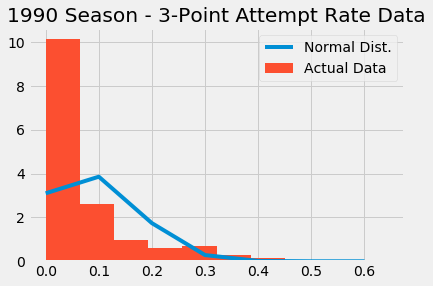

In [14]:
xs = np.arange(h_1990.min(), h_1990.max(), 0.1)
fit = stats.norm.pdf(xs, np.mean(h_1990), np.std(h_1990))
plt.plot(xs, fit, label='Normal Dist.', lw=4)
plt.hist(h_1990, density=True, label='Actual Data')
plt.title('1990 Season - 3-Point Attempt Rate Data')
plt.legend();

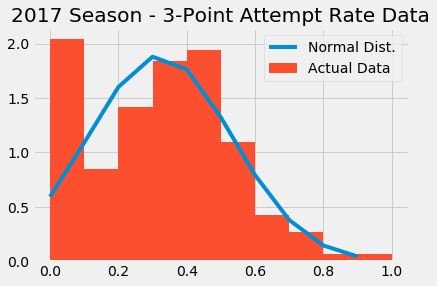

In [15]:
xs = np.arange(h_2017.min(), h_2017.max(), 0.1)
fit = stats.norm.pdf(xs, np.mean(h_2017), np.std(h_2017))
plt.plot(xs, fit, label='Normal Dist.', lw=4)
plt.hist(h_2017, density=True, label='Actual Data');
plt.title('2017 Season - 3-Point Attempt Rate Data')
plt.legend();

From these graphs, it is clear to see that the 3-point attempt rate for 1990 is not normal. However, the 2017-year does see an increase in 3-point attempt rate as well as a more normal graph. Next we look at whether or not there is a statistical difference between the two years, in terms of 3-point attempt rates, that is the percentage of 3-point attempts in comparison to total amount shot.

In [16]:

PAr_1990 = seasons[seasons["Year"] == 1990.0]["3PAr"].dropna()
PAr_2017 = seasons[seasons["Year"] == 2017.0]["3PAr"].dropna()
avg_3PAr_1990 = PAr_1990.mean()
avg_3PAr_2017 = PAr_2017.mean()
print(avg_3PAr_1990)
print(avg_3PAr_2017)

0.07150219298245618
0.3215581787521075


In [17]:
#checking the t and p values for the test
t_val, p_val = stats.ttest_ind(PAr_1990, PAr_2017)
print(p_val)
# Check if statistical test passes significance, using an alpha value of 0.01.
if p_val < 0.01:
    print('Data Science accomplished, there is a significant difference!')
else:
    print('There is NOT a significant difference!')
    

2.0368056326470206e-97
Data Science accomplished, there is a significant difference!


From this we can see that there is a significant difference in the three-point attempt rate. The NBA is prioritizing 3 point shots!

# Ethics & Privacy

Our group will find and use public datasets to ensure full transparency of our dataset and where they come from. Also, our team will not bash players, but rather speak only of the numbers and interpret the numbers and statistics in an appropriate context. Our aim is to not hold any team as “worse” than any other team, unless the numbers say so otherwise. This means our team doesn’t need to ask players for their data or do any “spying” on players. Our end goal is to highlight whether small-ball strategy is effective or not, and not to bash on any other strategy that a player/team may employ. No offence will be given or issued from our data analysis. The purpose of this project is purely for educational use, and will not benefit any third party outside of school boundaries.

Our data source will be obtained from Kaggle and https://www.basketball-reference.com/;  we assume that all the data collected is unbiased since basketball-reference.com simply tracks the numbers that occurred during a match and aggregates this data into other statistics, like 3 pt %. We suspect no harm of bias in this data because there shouldn’t be any emotional attachments to it (eg. no one is placing bets on these data and affecting the NBA players themselves). Our Kaggle dataset also comes from Omri Goldstein, a top data scientist from Israel who has participated in many data science competitions and is a leader in the data sciences. He has competed in numerous data science competitions and we trust that the judges in all of these competitions have vetted him for data biases. Kaggle is also a source for high quality datasets that many data scientists use to find sources of data. Furthermore, as the numbers we’ll be using are empirical data such as the player’s height, weight, etc., we don’t believe there is generally a room for error or emotional biases within our datasets. However, there are cases such as Kevin Durant, whose real height is supposedly much taller than his recorded height, so that could cause room for error even in the empirical data we’re tracking.

Through this research, we simply hope to verify the existence of small-ball strategies and whether even big centers are forced to spread the floor by being able to shoot 3 point shots. Therefore, we don’t believe that there will be any negative consequences to our research and unbiasedly hope to confirm or deny people’s belief in small-ball strategies over time. Lastly, we don’t believe that there will be any hugely impactful unintended consequences because we’re focusing on an idea that’s already present in most people’s minds, but not verified through hard data.


# Conclusion & Discussion

So from our statistical analysis and viewing general trends in height and weight through the years, our group would like to conclude that NBA players are becoming more well-rounded in terms of height and weight, and teams and players are recognizing the important of 3 point shots in their gameplay! Small-ball strategies seem to be more important now, especially since teams don't need to have "big-men" to keep scoring dunks and wins. 

From this study, we have statistically deduced that without a doubt, both NBA teams and players are shooting more 3's than ever before, and we believe that this is a trend that we will continue to see throughout the end of 2010's and into the 2020's. A further build up from this study could be studying the trends in the specific shot ranges over time, as we believe that the teams are also focusing less on mid range shots (2 points from afar) and more on dunks/points in the paint (2 points from close up), due to the efficacy of close range shots over mid range shots. Another potential study from this could be if the shot selection changes in the playoffs, as players are overall guarded more closely and coaches tend to be more flexible with allowing their star players to shoot more shots.

Overall, our group is excited by these results, and feel that with more small-ball strategies being viable, the NBA is experiencing a golden period in terms of potential plays. We hope to see even more developments in the future in regards to optmizing the play in basketball. As basketball fans, we wish to see even more interesting and dynamic trends come up over time and believe that it'll be a joy to experience all these new trends throughout our fandom.